### INFO284 Machine Learning eksamen, vår 2024
av ppa007 og ....
levert 30.4.2024

#### Import og versjonskontroll for relevante biblioteker.

In [239]:
import sys
print("Python version: {}".format(sys.version))
import pandas as pd
print("pandas version: {}".format(pd.__version__))
import matplotlib
import matplotlib.pyplot as plt
print("matplotlib version: {}".format(matplotlib.__version__))
import numpy as np
print("NumPy version: {}".format(np.__version__))
import scipy as sp
print("SciPy version: {}".format(sp.__version__))
import IPython
print("IPython version: {}".format(IPython.__version__))
import sklearn
print("scikit-learn version: {}".format(sklearn.__version__))
import seaborn as sns
print("seaborn version: {}".format(sns.__version__))

Python version: 3.12.3 (tags/v3.12.3:f6650f9, Apr  9 2024, 14:05:25) [MSC v.1938 64 bit (AMD64)]
pandas version: 2.2.1
matplotlib version: 3.8.3
NumPy version: 1.26.4
SciPy version: 1.12.0
IPython version: 8.21.0
scikit-learn version: 1.4.1.post1
seaborn version: 0.13.2


#### Import av datasettet
Filen er kodet i UTF-8, så den vil bare fungere hvis du har riktig versjon av pandas.

In [240]:
filePath = 'elektronisk-rapportering-ers-2018-fangstmelding-dca-simple.csv'
df = pd.read_csv(filePath, encoding="UTF-8" , delimiter=";")

In [241]:
from IPython.display import display

def status_dataframe(dataframe):
    pd.set_option('display.max_columns', None)
    pd.set_option('display.max_colwidth', None)
    print(f"Datasettet har nå {dataframe.shape[1]} kolonner og {dataframe.shape[0]} rader")
    display(dataframe.head(5))
    dataframe.info()

status_dataframe(df)

Datasettet har nå 45 kolonner og 305434 rader


,Melding ID,Meldingstidspunkt,Meldingsdato,Meldingsklokkeslett,Starttidspunkt,Startdato,Startklokkeslett,Startposisjon bredde,Startposisjon lengde,Hovedområde start (kode),Hovedområde start,Lokasjon start (kode),Havdybde start,Stopptidspunkt,Stoppdato,Stoppklokkeslett,Varighet,Fangstår,Stopposisjon bredde,Stopposisjon lengde,Hovedområde stopp (kode),Hovedområde stopp,Lokasjon stopp (kode),Havdybde stopp,Trekkavstand,Redskap FAO (kode),Redskap FAO,Redskap FDIR (kode),Redskap FDIR,Hovedart FAO (kode),Hovedart FAO,Hovedart - FDIR (kode),Art FAO (kode),Art FAO,Art - FDIR (kode),Art - FDIR,Art - gruppe (kode),Art - gruppe,Rundvekt,Lengdegruppe (kode),Lengdegruppe,Bruttotonnasje 1969,Bruttotonnasje annen,Bredde,Fartøylengde
0,1497177,01.01.2018,01.01.2018,00:00,31.12.2017,31.12.2017,00:00,"-60,35","-46,133",NaN,NaN,NaN,-2740,01.01.2018,01.01.2018,00:00,1440,2018,"-60,4","-46,15",NaN,NaN,NaN,-805,5649.0,OTM,"Flytetrål, otter",53.0,Flytetrål,KRI,Antarktisk krill,2513.0,KRI,Antarktisk krill,2513.0,Antarktisk krill,506.0,Antarktisk krill,706714.0,5.0,28 m og over,9432.0,NaN,"19,87","133,88"
1,1497178,01.01.2018,01.01.2018,00:00,30.12.2017 23:21,30.12.2017,23:21,"74,885","16,048",20.0,Bjørnøya,7.0,-335,31.12.2017 04:16,31.12.2017,04:16,295,2017,"74,914","15,969",20.0,Bjørnøya,7.0,-334,3970.0,OTB,"Bunntrål, otter",51.0,Bunntrål,HAD,Hyse,1027.0,HAD,Hyse,1027.0,Hyse,202.0,Hyse,9594.0,5.0,28 m og over,1476.0,NaN,"12,6","56,8"
2,1497178,01.01.2018,01.01.2018,00:00,30.12.2017 23:21,30.12.2017,23:21,"74,885","16,048",20.0,Bjørnøya,7.0,-335,31.12.2017 04:16,31.12.2017,04:16,295,2017,"74,914","15,969",20.0,Bjørnøya,7.0,-334,3970.0,OTB,"Bunntrål, otter",51.0,Bunntrål,HAD,Hyse,1027.0,COD,Torsk,1022.0,Torsk,201.0,Torsk,8510.0,5.0,28 m og over,1476.0,NaN,"12,6","56,8"
3,1497178,01.01.2018,01.01.2018,00:00,30.12.2017 23:21,30.12.2017,23:21,"74,885","16,048",20.0,Bjørnøya,7.0,-335,31.12.2017 04:16,31.12.2017,04:16,295,2017,"74,914","15,969",20.0,Bjørnøya,7.0,-334,3970.0,OTB,"Bunntrål, otter",51.0,Bunntrål,HAD,Hyse,1027.0,GHL,Blåkveite,2313.0,Blåkveite,301.0,Blåkveite,196.0,5.0,28 m og over,1476.0,NaN,"12,6","56,8"
4,1497178,01.01.2018,01.01.2018,00:00,30.12.2017 23:21,30.12.2017,23:21,"74,885","16,048",20.0,Bjørnøya,7.0,-335,31.12.2017 04:16,31.12.2017,04:16,295,2017,"74,914","15,969",20.0,Bjørnøya,7.0,-334,3970.0,OTB,"Bunntrål, otter",51.0,Bunntrål,HAD,Hyse,1027.0,POK,Sei,1032.0,Sei,203.0,Sei,134.0,5.0,28 m og over,1476.0,NaN,"12,6","56,8"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305434 entries, 0 to 305433
Data columns (total 45 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Melding ID                305434 non-null  int64  
 1   Meldingstidspunkt         305434 non-null  object 
 2   Meldingsdato              305434 non-null  object 
 3   Meldingsklokkeslett       305434 non-null  object 
 4   Starttidspunkt            305434 non-null  object 
 5   Startdato                 305434 non-null  object 
 6   Startklokkeslett          305434 non-null  object 
 7   Startposisjon bredde      305434 non-null  object 
 8   Startposisjon lengde      305434 non-null  object 
 9   Hovedområde start (kode)  303433 non-null  float64
 10  Hovedområde start         301310 non-null  object 
 11  Lokasjon start (kode)     303433 non-null  float64
 12  Havdybde start            305434 non-null  int64  
 13  Stopptidspunkt            305434 non-null  o

#### Valg av mål og forbehandling
Våre valgte målvariabler er fangstene av hyse, torsk og sei som kontinuerlige verdier. Dette betyr at det er en kombinasjon av kolonnene "Art FAO", som indikerer den fangede arten, og "Rundvekt", som indikerer vekten av fangsten.

Først vil vi sette opp et frø som vi vil bruke i testing for å gjøre resultatene mer sammenlignbare på tvers av ulike modeller.

In [242]:
seed = 32

Nan verdier: Første sjekker vi mengden nan verider i hver kolonne. Med unntak av "Bruttotonnasje 1969" og "Bruttotonnasje annen" så er antallet lavt i de fleste kolonner. Videre sjekker vi den totale mengden rader med nan verdier i lavfrekvens kolonnene. Den totale mengden er så liten at vi fjerner alle de radene. De to kolonnene med høy frekvens blir ryddet i seinere.


In [243]:
df.isnull().sum()

Melding ID                       0
Meldingstidspunkt                0
Meldingsdato                     0
Meldingsklokkeslett              0
Starttidspunkt                   0
Startdato                        0
Startklokkeslett                 0
Startposisjon bredde             0
Startposisjon lengde             0
Hovedområde start (kode)      2001
Hovedområde start             4124
Lokasjon start (kode)         2001
Havdybde start                   0
Stopptidspunkt                   0
Stoppdato                        0
Stoppklokkeslett                 0
Varighet                         0
Fangstår                         0
Stopposisjon bredde              0
Stopposisjon lengde              0
Hovedområde stopp (kode)      1962
Hovedområde stopp             4124
Lokasjon stopp (kode)         1962
Havdybde stopp                   0
Trekkavstand                    24
Redskap FAO (kode)               0
Redskap FAO                    188
Redskap FDIR (kode)            188
Redskap FDIR        

In [244]:
exclude_columns = ['Bruttotonnasje 1969', 'Bruttotonnasje annen']

nan_count = df.drop(exclude_columns, axis=1).isnull().any(axis=1).sum()
print(f"Det er {nan_count} rader med nan verdier")

Det er 9814 rader med nan verdier


In [245]:
df.dropna(subset=[col for col in df.columns if col not in exclude_columns], inplace = True)
df.isnull().sum()

Melding ID                       0
Meldingstidspunkt                0
Meldingsdato                     0
Meldingsklokkeslett              0
Starttidspunkt                   0
Startdato                        0
Startklokkeslett                 0
Startposisjon bredde             0
Startposisjon lengde             0
Hovedområde start (kode)         0
Hovedområde start                0
Lokasjon start (kode)            0
Havdybde start                   0
Stopptidspunkt                   0
Stoppdato                        0
Stoppklokkeslett                 0
Varighet                         0
Fangstår                         0
Stopposisjon bredde              0
Stopposisjon lengde              0
Hovedområde stopp (kode)         0
Hovedområde stopp                0
Lokasjon stopp (kode)            0
Havdybde stopp                   0
Trekkavstand                     0
Redskap FAO (kode)               0
Redskap FAO                      0
Redskap FDIR (kode)              0
Redskap FDIR        

Neste steg er å ekskludere irrelevante kolonner.
- Fangstår: Datasettet er fra 2018, men inneholder noen rapporter fra 2017 da de ble rapportert inn etter nyttårsaften. Vi fjerner den fordi den bare inneholder 2 unike verdier, hvor over 99% av dem er bare en av dem.

In [246]:
value_counts = df['Fangstår'].value_counts()
print(value_counts)
df.drop(columns = ['Fangstår'], inplace= True)

Fangstår
2018    295602
2017        18
Name: count, dtype: int64


- Nesten alle "navn" og "navn (kode)" er samme informasjonen. For å beholde lesbarheten for mennesker fjerner vi følgende kode versjonene: Hovedområde start (kode), Redskap FAO (kode), Redskap FDIR (kode), Hovedart FAO (kode), Art FAO (kode), Art - FDIR (kode), Art - gruppe (kode), Lengdegruppe (kode).
- Hovedområde stopp (kode): Har en rekke forskjellige koder på samme "Hovedområde stopp". Antar at det har skjedd noe feil med registreringen. Sammenlingner det derfor med "Hovedområde start" som hadde en 1:1 relasjon på alle områdenavn og koder. Gjør det gjennom å se hvilken koder som hadde høyst frekvens for "Hovedområde stopp" og ser om det er samme kode i "Hovedområde start". Det viser en total overlapp, vi fjerner derfor og "Hovedområde stopp (kode)".

In [247]:
def test_likhet(dataframe, feature1, feature2):
    value_counts = dataframe.groupby([feature1, feature2]).size().unstack(fill_value=0)

    dict_sum = {}

    for column in value_counts.columns:
        dict_sum.setdefault(column, [])
        dict_sum[column].extend(list(zip(
            value_counts.index[value_counts[column] != 0].tolist(),
            value_counts[value_counts[column] != 0][column].tolist()
        )))
    mismatch = []
    tuple_counts = {key: len(value) for key, value in dict_sum.items()}
    for key, value in tuple_counts.items():
        if value > 1:
            mismatch.append(key)

    jada = list(feature2.unique())
    neida = []
    for x in jada:
        if x not in dict_sum.keys():
            neida.append(x)
            
    nøkler = []
    for value in dict_sum.values():
        tup = value[0]
        nøkler.append(tup[0])

    jada1 = list(feature1.unique())
    neida1 = []
    for x in jada1:
        if x not in nøkler:
            neida1.append(x)

    lengde1 = len(feature1.unique())
    lengde2 = len(feature2.unique())

    if len(mismatch) > 0:
        print(f"Disse kolonnene har verdier som ikke overlapper 100%: {mismatch}")
        return dict_sum
    else:
        print(f"Verdiene i kolonnene {feature2.name} og {feature1.name} overlapper.")
        print(f"{feature2.name} har {lengde2} unike verdier, mens {feature1.name} har {lengde1} unike verdier.")
        if len(neida) > 0:
            print(f"Verdier i {feature2.name} som ikke har verdier i {feature1.name}: {neida}")
        if len(neida1) > 0:
            print(f"Verdier i {feature1.name} som ikke har verdier i {feature2.name}: {neida1}")
        print(f"Utskrift av dictionary der nøkkelen er verdier i {feature2.name} og verdien er en tuple av verdien i {feature1.name} og antall forekomster av den:")
        return dict_sum
   

In [248]:
utskrift = test_likhet(df, df["Redskap FAO"], df["Redskap FAO (kode)"])
print(utskrift)

Verdiene i kolonnene Redskap FAO (kode) og Redskap FAO overlapper.
Redskap FAO (kode) har 29 unike verdier, mens Redskap FAO har 29 unike verdier.
Utskrift av dictionary der nøkkelen er verdier i Redskap FAO (kode) og verdien er en tuple av verdien i Redskap FAO og antall forekomster av den:
{'FPO': [('Teiner', 5856)], 'GEN': [('Gillnets and entangling nets (unspec)*', 13871)], 'GN': [('Udefinert garn', 4716)], 'GNC': [('Encircling gillnets*', 349)], 'GNS': [('Settegarn', 648)], 'HAR': [('Harpun,div.', 291)], 'LHP': [('Juksa/pilk, manuell', 19)], 'LL': [('Andre liner', 24667)], 'LLS': [('Setteline', 18816)], 'LTL': [('Dorg/harp/snik', 15)], 'OT': [('Udefinert trål', 8)], 'OTB': [('Bunntrål, otter', 120050)], 'OTM': [('Flytetrål, otter', 1812)], 'OTT': [('Otter dobbeltrål', 2805)], 'PS': [('Snurpenot/ringnot', 1654)], 'PS1': [('Snurpenot/ringnot, et fartøy', 6040)], 'PS2': [('Snurpenot/ringnot, to fartøy', 2083)], 'PT': [('Partrål, uspesifisert', 258)], 'PTB': [('Bunntrål, par', 3140)],

In [249]:
utskrift = test_likhet(df, df["Redskap FDIR"], df["Redskap FDIR (kode)"])
print(utskrift)

Verdiene i kolonnene Redskap FDIR (kode) og Redskap FDIR overlapper.
Redskap FDIR (kode) har 16 unike verdier, mens Redskap FDIR har 16 unike verdier.
Utskrift av dictionary der nøkkelen er verdier i Redskap FDIR (kode) og verdien er en tuple av verdien i Redskap FDIR og antall forekomster av den:
{11.0: [('Snurpenot/ringnot', 9777)], 20.0: [('Udefinert garn', 18936)], 22.0: [('Settegarn', 648)], 32.0: [('Andre liner', 43483)], 33.0: [('Juksa/pilk', 19)], 34.0: [('Dorg/harp/snik', 15)], 42.0: [('Teiner', 5856)], 50.0: [('Udefinert trål', 15347)], 51.0: [('Bunntrål', 120050)], 52.0: [('Bunntrål par', 3140)], 53.0: [('Flytetrål', 1812)], 54.0: [('Flytetrål par', 1452)], 55.0: [('Reketrål', 22087)], 58.0: [('Dobbeltrål', 2805)], 61.0: [('Snurrevad', 49902)], 70.0: [('Harpun og lignende uspesifiserte typer', 291)]}


In [250]:
utskrift = test_likhet(df, df["Hovedart FAO"], df["Hovedart FAO (kode)"])
print(utskrift)

Verdiene i kolonnene Hovedart FAO (kode) og Hovedart FAO overlapper.
Hovedart FAO (kode) har 63 unike verdier, mens Hovedart FAO har 63 unike verdier.
Utskrift av dictionary der nøkkelen er verdier i Hovedart FAO (kode) og verdien er en tuple av verdien i Hovedart FAO og antall forekomster av den:
{'ARG': [('Strømsild/Vassild', 298)], 'ARU': [('Vassild', 1120)], 'ARY': [('Strømsild', 314)], 'BFT': [('Makrellstørje', 2)], 'BLI': [('Blålange', 37)], 'BLW': [('Blåhval', 1)], 'CAA': [('Gråsteinbit', 203)], 'CAB': [('Blåsteinbit', 163)], 'CAP': [('Lodde', 1372)], 'CAS': [('Flekksteinbit', 896)], 'CAT': [('Steinbiter', 112)], 'CMO': [('Havmus', 18)], 'COD': [('Torsk', 85367)], 'CRE': [('Taskekrabbe', 519)], 'CRQ': [('Snøkrabbe', 5269)], 'CUS': [('Pink cusk-eel*', 196)], 'DAB': [('Sandflyndre', 3)], 'DGS': [('Pigghå', 37)], 'FLE': [('Skrubbe', 8)], 'GAD': [('Annen torskefisk', 12)], 'GDG': [('Sølvtorsk', 70)], 'GFB': [('Skjellbrosme', 27)], 'GHL': [('Blåkveite', 4964)], 'HAD': [('Hyse', 28038

In [251]:
utskrift = test_likhet(df, df["Art FAO"], df["Art FAO (kode)"])
print(utskrift)

Verdiene i kolonnene Art FAO (kode) og Art FAO overlapper.
Art FAO (kode) har 118 unike verdier, mens Art FAO har 118 unike verdier.
Utskrift av dictionary der nøkkelen er verdier i Art FAO (kode) og verdien er en tuple av verdien i Art FAO og antall forekomster av den:
{'ANE': [('Ansjos', 1)], 'ARG': [('Strømsild/Vassild', 421)], 'ARU': [('Vassild', 280)], 'ARY': [('Strømsild', 949)], 'BFT': [('Makrellstørje', 5)], 'BHG': [('Nordlig lysprikkfisk', 9)], 'BIB': [('Skjeggtorsk', 1)], 'BLI': [('Blålange', 980)], 'BLL': [('Slettvar', 43)], 'BLW': [('Blåhval', 1)], 'BOC': [('Villsvinfisk', 7)], 'BRF': [('Blåkjeft', 89)], 'CAA': [('Gråsteinbit', 5346)], 'CAB': [('Blåsteinbit', 2096)], 'CAP': [('Lodde', 1182)], 'CAS': [('Flekksteinbit', 7968)], 'CAT': [('Steinbiter', 625)], 'CEP': [('Blekkspruter uspes.', 4)], 'CFB': [('Islandshå', 4)], 'CMO': [('Havmus', 838)], 'COD': [('Torsk', 56054)], 'COE': [('Havål', 2)], 'CRE': [('Taskekrabbe', 472)], 'CRQ': [('Snøkrabbe', 5269)], 'CUS': [('Pink cusk-e

In [252]:
utskrift = test_likhet(df, df["Art - FDIR (kode)"], df["Art - FDIR"])
print(utskrift)

Verdiene i kolonnene Art - FDIR og Art - FDIR (kode) overlapper.
Art - FDIR har 118 unike verdier, mens Art - FDIR (kode) har 118 unike verdier.
Utskrift av dictionary der nøkkelen er verdier i Art - FDIR og verdien er en tuple av verdien i Art - FDIR (kode) og antall forekomster av den:
{'Akkar': [(2634.0, 249)], 'Annen blekksprut': [(2639.0, 8)], 'Annen flatfisk': [(2399.0, 4)], 'Annen flyndre': [(2329.0, 416)], 'Annen makrell': [(2015.0, 1)], 'Annen marin fisk': [(2919.0, 2358)], 'Annen sardin': [(612.0, 4)], 'Annen skate og rokke': [(599.0, 2118)], 'Annen vanlig ti-armet blekksprut': [(2636.0, 2)], 'Ansjos': [(621.0, 1)], 'Blekksprut, uspes.': [(2638.0, 4)], 'Blåhval': [(2733.0, 1)], 'Blåkjeft': [(2205.0, 89)], 'Blåkveite': [(2313.0, 8033)], 'Blålange': [(1024.0, 980)], 'Blåsteinbit': [(1713.0, 2096)], 'Blæretang': [(2817.0, 1)], 'Breiflabb': [(2411.0, 8509)], 'Brisling': [(615.0, 207)], 'Brosme': [(1021.0, 9113)], 'Bukstripet pelamide': [(2018.0, 1)], 'Burton-skate': [(528.0, 2)],

In [253]:
utskrift = test_likhet(df, df["Art - gruppe (kode)"], df["Art - gruppe"])
print(utskrift)

Verdiene i kolonnene Art - gruppe og Art - gruppe (kode) overlapper.
Art - gruppe har 29 unike verdier, mens Art - gruppe (kode) har 29 unike verdier.
Utskrift av dictionary der nøkkelen er verdier i Art - gruppe og verdien er en tuple av verdien i Art - gruppe (kode) og antall forekomster av den:
{'Andre skalldyr, bløtdyr og pigghuder': [(520.0, 1248)], 'Annen flatfisk, bunnfisk og dypvannsfisk': [(320.0, 25117)], 'Annen pelagisk fisk': [(120.0, 1760)], 'Annen torskefisk': [(220.0, 45026)], 'Blåkveite': [(301.0, 8033)], 'Brunalger': [(901.0, 2)], 'Dypvannsreke': [(505.0, 13364)], 'Haifisk': [(401.0, 461)], 'Hyse': [(202.0, 38776)], 'Kolmule': [(105.0, 2708)], 'Kongekrabbe, annen': [(504.0, 4)], 'Kystbrisling': [(110.0, 207)], 'Lodde': [(101.0, 1182)], 'Makrell': [(104.0, 2992)], 'Mesopelagisk fisk': [(111.0, 58)], 'Raudåte': [(507.0, 198)], 'Sei': [(203.0, 42278)], 'Sild, annen': [(103.0, 5740)], 'Sjøpattedyr': [(9903.0, 295)], 'Skater og annen bruskfisk': [(402.0, 4036)], 'Snøkrabbe'

In [254]:
utskrift = test_likhet(df, df["Lengdegruppe (kode)"], df["Lengdegruppe"])
print(utskrift)

Verdiene i kolonnene Lengdegruppe og Lengdegruppe (kode) overlapper.
Lengdegruppe har 3 unike verdier, mens Lengdegruppe (kode) har 3 unike verdier.
Utskrift av dictionary der nøkkelen er verdier i Lengdegruppe og verdien er en tuple av verdien i Lengdegruppe (kode) og antall forekomster av den:
{'15-20,99 m': [(3.0, 34809)], '21-27,99 m': [(4.0, 55911)], '28 m og over': [(5.0, 204900)]}


In [255]:
utskrift = test_likhet(df, df["Hovedområde start (kode)"], df["Hovedområde start"])
print(utskrift)

Verdiene i kolonnene Hovedområde start og Hovedområde start (kode) overlapper.
Hovedområde start har 53 unike verdier, mens Hovedområde start (kode) har 53 unike verdier.
Utskrift av dictionary der nøkkelen er verdier i Hovedområde start og verdien er en tuple av verdien i Hovedområde start (kode) og antall forekomster av den:
{'Admiralityfeltet': [(16.0, 1909)], 'Bjørnøya': [(20.0, 25139)], 'Britvinfeltet': [(14.0, 47)], 'Danmarkstredet': [(61.0, 639)], 'Eigersundbanken': [(8.0, 44733)], 'Flemish Cap': [(81.0, 47)], 'Fyllas Bank': [(68.0, 243)], 'Færøybanken': [(58.0, 95)], 'Gammelock': [(62.0, 1)], 'Gåsebanken': [(11.0, 1695)], 'Helgelandsbanken': [(6.0, 8062)], 'Hopen': [(23.0, 3120)], 'Kaninbanken': [(1.0, 682)], 'Murmanskkysten': [(2.0, 203)], 'Nord av Island': [(55.0, 2)], 'Nordkappbanken': [(12.0, 18606)], 'Nordv.- Spitsbergen': [(25.0, 151)], 'Nordvestlige Norskehav': [(38.0, 4)], 'Nordøst av Island': [(56.0, 452)], 'Nordøstområdet': [(17.0, 685)], 'Rockall': [(47.0, 581)], 'Rø

In [256]:
mismatch = test_likhet(df, df["Hovedområde stopp (kode)"], df["Hovedområde stopp"])

new1 = {}
for key, tuples in mismatch.items():
    max_tuple = max(tuples, key=lambda x: x[1])
    new1[key] = max_tuple

new2 = {}

for key, value in utskrift.items():
    new2[key] = value[0]

count_same = 0

for key in new1.keys():
    if key in new2:
        code_original = new1[key][0]
        code_another = new2[key][0]
        if code_original == code_another:
            count_same += 1
        else:
            print(f"Området '{key}' har to forskjellige dominante koder: '{code_original}' og '{code_another}'.")
prosent = (count_same / len(mismatch)) * 100
print(f"For Hovedområde start og stopp er koden registret flest ganger den samme i {prosent} % av tilfeller. ")

Disse kolonnene har verdier som ikke overlapper 100%: ['Admiralityfeltet', 'Bjørnøya', 'Britvinfeltet', 'Eigersundbanken', 'Færøybanken', 'Gåsebanken', 'Helgelandsbanken', 'Hopen', 'Kaninbanken', 'Murmanskkysten', 'Nordkappbanken', 'Nordøst av Island', 'Nordøstområdet', 'Rockall', 'Røstbanken til Malangsgrunnen', 'Sentralbanken', 'Sentrale Nordsjø', 'Sentrale Norskehav', 'Shetland', 'Skagerrak', 'Skolpenbanken', 'Storbanken', 'Storegga-Frøyabanken', 'Storfjord/Hinlopenstredet', 'Sørlige Norskehav', 'Sørvest av Spitsbergen', 'Thor Iversens Bank', 'Vest av Færøyene', 'Vest av Irland', 'Vest av Skottland (Hebridene)', 'Vest av Tromsøflaket', 'Vest-Finnmark', 'Vest-Spitsbergen', 'Vestfjorden (Lofoten)', 'Vestlige Norskehav', 'Vikingbanken', 'Øst av Færøyene', 'Øst av Island', 'Øst-Finnmark', 'Østlige Norskehav']
Området 'Sørvest av Spitsbergen' har to forskjellige dominante koder: '20.0' og '27.0'.
For Hovedområde start og stopp er koden registret flest ganger den samme i 98.11320754716981

In [257]:
df.drop(columns=["Hovedområde start (kode)", "Hovedområde stopp (kode)", "Redskap FAO (kode)", "Redskap FDIR (kode)", "Hovedart FAO (kode)", "Art FAO (kode)", "Art - FDIR (kode)", "Art - gruppe (kode)", "Lengdegruppe (kode)"], inplace=True)
status_dataframe(df)

Datasettet har nå 35 kolonner og 295620 rader


,Melding ID,Meldingstidspunkt,Meldingsdato,Meldingsklokkeslett,Starttidspunkt,Startdato,Startklokkeslett,Startposisjon bredde,Startposisjon lengde,Hovedområde start,Lokasjon start (kode),Havdybde start,Stopptidspunkt,Stoppdato,Stoppklokkeslett,Varighet,Stopposisjon bredde,Stopposisjon lengde,Hovedområde stopp,Lokasjon stopp (kode),Havdybde stopp,Trekkavstand,Redskap FAO,Redskap FDIR,Hovedart FAO,Hovedart - FDIR (kode),Art FAO,Art - FDIR,Art - gruppe,Rundvekt,Lengdegruppe,Bruttotonnasje 1969,Bruttotonnasje annen,Bredde,Fartøylengde
1,1497178,01.01.2018,01.01.2018,00:00,30.12.2017 23:21,30.12.2017,23:21,"74,885","16,048",Bjørnøya,7.0,-335,31.12.2017 04:16,31.12.2017,04:16,295,"74,914","15,969",Bjørnøya,7.0,-334,3970.0,"Bunntrål, otter",Bunntrål,Hyse,1027.0,Hyse,Hyse,Hyse,9594.0,28 m og over,1476.0,NaN,"12,6","56,8"
2,1497178,01.01.2018,01.01.2018,00:00,30.12.2017 23:21,30.12.2017,23:21,"74,885","16,048",Bjørnøya,7.0,-335,31.12.2017 04:16,31.12.2017,04:16,295,"74,914","15,969",Bjørnøya,7.0,-334,3970.0,"Bunntrål, otter",Bunntrål,Hyse,1027.0,Torsk,Torsk,Torsk,8510.0,28 m og over,1476.0,NaN,"12,6","56,8"
3,1497178,01.01.2018,01.01.2018,00:00,30.12.2017 23:21,30.12.2017,23:21,"74,885","16,048",Bjørnøya,7.0,-335,31.12.2017 04:16,31.12.2017,04:16,295,"74,914","15,969",Bjørnøya,7.0,-334,3970.0,"Bunntrål, otter",Bunntrål,Hyse,1027.0,Blåkveite,Blåkveite,Blåkveite,196.0,28 m og over,1476.0,NaN,"12,6","56,8"
4,1497178,01.01.2018,01.01.2018,00:00,30.12.2017 23:21,30.12.2017,23:21,"74,885","16,048",Bjørnøya,7.0,-335,31.12.2017 04:16,31.12.2017,04:16,295,"74,914","15,969",Bjørnøya,7.0,-334,3970.0,"Bunntrål, otter",Bunntrål,Hyse,1027.0,Sei,Sei,Sei,134.0,28 m og over,1476.0,NaN,"12,6","56,8"
5,1497178,01.01.2018,01.01.2018,00:00,31.12.2017 05:48,31.12.2017,05:48,"74,91","15,868",Bjørnøya,7.0,-403,31.12.2017 10:15,31.12.2017,10:15,267,"74,901","16,248",Bjørnøya,7.0,-277,11096.0,"Bunntrål, otter",Bunntrål,Hyse,1027.0,Hyse,Hyse,Hyse,9118.0,28 m og over,1476.0,NaN,"12,6","56,8"


<class 'pandas.core.frame.DataFrame'>
Index: 295620 entries, 1 to 305433
Data columns (total 35 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Melding ID              295620 non-null  int64  
 1   Meldingstidspunkt       295620 non-null  object 
 2   Meldingsdato            295620 non-null  object 
 3   Meldingsklokkeslett     295620 non-null  object 
 4   Starttidspunkt          295620 non-null  object 
 5   Startdato               295620 non-null  object 
 6   Startklokkeslett        295620 non-null  object 
 7   Startposisjon bredde    295620 non-null  object 
 8   Startposisjon lengde    295620 non-null  object 
 9   Hovedområde start       295620 non-null  object 
 10  Lokasjon start (kode)   295620 non-null  float64
 11  Havdybde start          295620 non-null  int64  
 12  Stopptidspunkt          295620 non-null  object 
 13  Stoppdato               295620 non-null  object 
 14  Stoppklokkeslett        2

- Lengdegruppe, Bruttotonnasje 1969, Bruttotonnasje annen, Bredde, Fartøylengde: Disse kolonnene representerer liggnende informasjon om fangstbåten på forskjellige måter. Utifra det vi ønsker å predikere virker det mest hennsikstmessig å kun beholde bruttotonasje. Men for å gjøre det må vi først bevise likheten mellom de forskjellige variablene.

1. Bruttotonnasje 1969 og Bruttotonnasje annen: Når den ene kolonnen er tom har den andre data. Vi slår sammen begge kolonene og fjerner de radene hvor begge kolonnen er tomme.
2. Fartøylengde er en mer nyansert versjon av Lengdegruppe.
3. Fartøylengde og Bredde har en sterk korelasjon.
4. Fartøylengde og Bruttotonnasje har en sterk korelasjon.

In [258]:
b_nan = df['Bruttotonnasje 1969'].notnull() & df['Bruttotonnasje annen'].isnull()
a_nan = df['Bruttotonnasje annen'].notnull() & df['Bruttotonnasje 1969'].isnull()
both_nan = df['Bruttotonnasje 1969'].isnull() & df['Bruttotonnasje annen'].isnull()

print(f"""Kun Bruttotonnasje 1969 rader har verdi: {b_nan.sum()}
Kun Bruttotonnasje annen rader har verdi: {a_nan.sum()}
Begge kolonner har nan verdi: {both_nan.sum()}""")

df['Bruttotonnasje'] = df['Bruttotonnasje annen'].combine_first(df['Bruttotonnasje 1969'])
df.drop(columns=['Bruttotonnasje annen', "Bruttotonnasje 1969"], inplace=True)
df = df.dropna(subset=['Bruttotonnasje'])

Kun Bruttotonnasje 1969 rader har verdi: 221123
Kun Bruttotonnasje annen rader har verdi: 66255
Begge kolonner har nan verdi: 2271


In [259]:
df['Fartøylengde'] = df['Fartøylengde'].str.replace(',', '.').astype(float)
df['Bredde'] = df['Bredde'].str.replace(',', '.').astype(float)

In [260]:
min_max_values = df.groupby('Lengdegruppe')['Fartøylengde'].agg(['min', 'max'])
print(min_max_values)

                min    max
Lengdegruppe              
15-20,99 m    15.01  20.99
21-27,99 m    21.07  27.99
28 m og over  28.10  81.20


Correlation coefficient: 0.9463290118094945


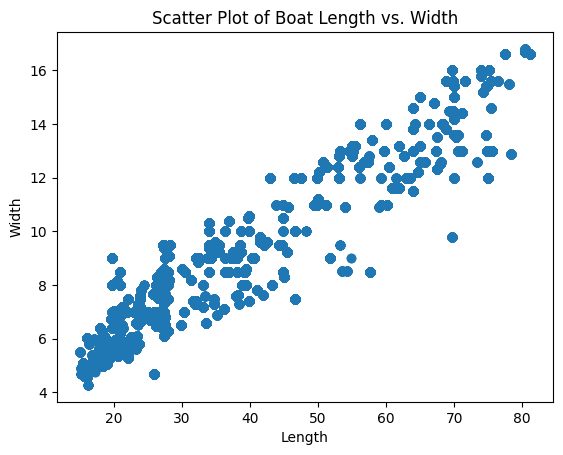

In [261]:
correlation = df['Fartøylengde'].corr(df['Bredde'])
print("Correlation coefficient:", correlation)

# Scatter plot of length vs. width
plt.scatter(df['Fartøylengde'], df['Bredde'])
plt.xlabel('Length')
plt.ylabel('Width')
plt.title('Scatter Plot of Boat Length vs. Width')
plt.show()

Correlation coefficient: 0.9244864119133088


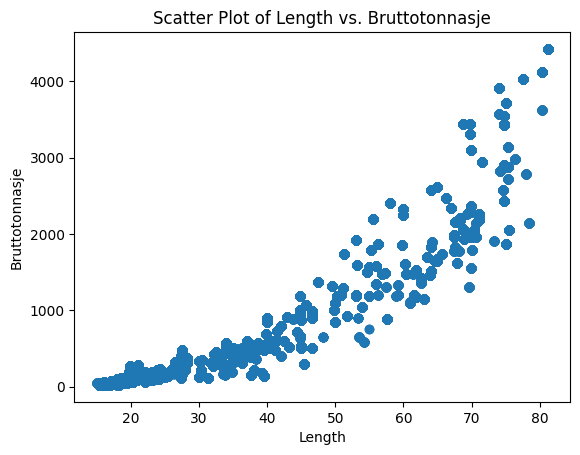

In [262]:
correlation = df['Fartøylengde'].corr(df['Bruttotonnasje'])
print("Correlation coefficient:", correlation)

# Scatter plot of length vs. width
plt.scatter(df['Fartøylengde'], df['Bruttotonnasje'])
plt.xlabel('Length')
plt.ylabel('Bruttotonnasje')
plt.title('Scatter Plot of Length vs. Bruttotonnasje')
plt.show()

In [263]:
df.drop(columns=["Lengdegruppe", "Bredde", "Fartøylengde"], inplace=True)
status_dataframe(df)

Datasettet har nå 31 kolonner og 293349 rader


,Melding ID,Meldingstidspunkt,Meldingsdato,Meldingsklokkeslett,Starttidspunkt,Startdato,Startklokkeslett,Startposisjon bredde,Startposisjon lengde,Hovedområde start,Lokasjon start (kode),Havdybde start,Stopptidspunkt,Stoppdato,Stoppklokkeslett,Varighet,Stopposisjon bredde,Stopposisjon lengde,Hovedområde stopp,Lokasjon stopp (kode),Havdybde stopp,Trekkavstand,Redskap FAO,Redskap FDIR,Hovedart FAO,Hovedart - FDIR (kode),Art FAO,Art - FDIR,Art - gruppe,Rundvekt,Bruttotonnasje
1,1497178,01.01.2018,01.01.2018,00:00,30.12.2017 23:21,30.12.2017,23:21,"74,885","16,048",Bjørnøya,7.0,-335,31.12.2017 04:16,31.12.2017,04:16,295,"74,914","15,969",Bjørnøya,7.0,-334,3970.0,"Bunntrål, otter",Bunntrål,Hyse,1027.0,Hyse,Hyse,Hyse,9594.0,1476.0
2,1497178,01.01.2018,01.01.2018,00:00,30.12.2017 23:21,30.12.2017,23:21,"74,885","16,048",Bjørnøya,7.0,-335,31.12.2017 04:16,31.12.2017,04:16,295,"74,914","15,969",Bjørnøya,7.0,-334,3970.0,"Bunntrål, otter",Bunntrål,Hyse,1027.0,Torsk,Torsk,Torsk,8510.0,1476.0
3,1497178,01.01.2018,01.01.2018,00:00,30.12.2017 23:21,30.12.2017,23:21,"74,885","16,048",Bjørnøya,7.0,-335,31.12.2017 04:16,31.12.2017,04:16,295,"74,914","15,969",Bjørnøya,7.0,-334,3970.0,"Bunntrål, otter",Bunntrål,Hyse,1027.0,Blåkveite,Blåkveite,Blåkveite,196.0,1476.0
4,1497178,01.01.2018,01.01.2018,00:00,30.12.2017 23:21,30.12.2017,23:21,"74,885","16,048",Bjørnøya,7.0,-335,31.12.2017 04:16,31.12.2017,04:16,295,"74,914","15,969",Bjørnøya,7.0,-334,3970.0,"Bunntrål, otter",Bunntrål,Hyse,1027.0,Sei,Sei,Sei,134.0,1476.0
5,1497178,01.01.2018,01.01.2018,00:00,31.12.2017 05:48,31.12.2017,05:48,"74,91","15,868",Bjørnøya,7.0,-403,31.12.2017 10:15,31.12.2017,10:15,267,"74,901","16,248",Bjørnøya,7.0,-277,11096.0,"Bunntrål, otter",Bunntrål,Hyse,1027.0,Hyse,Hyse,Hyse,9118.0,1476.0


<class 'pandas.core.frame.DataFrame'>
Index: 293349 entries, 1 to 305433
Data columns (total 31 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Melding ID              293349 non-null  int64  
 1   Meldingstidspunkt       293349 non-null  object 
 2   Meldingsdato            293349 non-null  object 
 3   Meldingsklokkeslett     293349 non-null  object 
 4   Starttidspunkt          293349 non-null  object 
 5   Startdato               293349 non-null  object 
 6   Startklokkeslett        293349 non-null  object 
 7   Startposisjon bredde    293349 non-null  object 
 8   Startposisjon lengde    293349 non-null  object 
 9   Hovedområde start       293349 non-null  object 
 10  Lokasjon start (kode)   293349 non-null  float64
 11  Havdybde start          293349 non-null  int64  
 12  Stopptidspunkt          293349 non-null  object 
 13  Stoppdato               293349 non-null  object 
 14  Stoppklokkeslett        2

- Hovedområde start ,Lokasjon start (kode), Hovedområde stopp, Lokasjon stopp (kode): beskrives i (ref 1) som "Dette er en beregnet verdi fra system med bakgrunn i posisjoner som fisker oppgir i innrapporteringen i fangstmeldingen." Noe som betyr at bredde og lengde grader for start og stopp-posisjon resprsenterer samme informasjon som en mer nyansert kontinuerlig verdi. Vi dropper derfor disse kolonnene.

In [264]:
df.drop(columns=["Hovedområde start", "Lokasjon start (kode)", "Hovedområde stopp", "Lokasjon stopp (kode)"], inplace=True)
status_dataframe(df)

Datasettet har nå 27 kolonner og 293349 rader


,Melding ID,Meldingstidspunkt,Meldingsdato,Meldingsklokkeslett,Starttidspunkt,Startdato,Startklokkeslett,Startposisjon bredde,Startposisjon lengde,Havdybde start,Stopptidspunkt,Stoppdato,Stoppklokkeslett,Varighet,Stopposisjon bredde,Stopposisjon lengde,Havdybde stopp,Trekkavstand,Redskap FAO,Redskap FDIR,Hovedart FAO,Hovedart - FDIR (kode),Art FAO,Art - FDIR,Art - gruppe,Rundvekt,Bruttotonnasje
1,1497178,01.01.2018,01.01.2018,00:00,30.12.2017 23:21,30.12.2017,23:21,"74,885","16,048",-335,31.12.2017 04:16,31.12.2017,04:16,295,"74,914","15,969",-334,3970.0,"Bunntrål, otter",Bunntrål,Hyse,1027.0,Hyse,Hyse,Hyse,9594.0,1476.0
2,1497178,01.01.2018,01.01.2018,00:00,30.12.2017 23:21,30.12.2017,23:21,"74,885","16,048",-335,31.12.2017 04:16,31.12.2017,04:16,295,"74,914","15,969",-334,3970.0,"Bunntrål, otter",Bunntrål,Hyse,1027.0,Torsk,Torsk,Torsk,8510.0,1476.0
3,1497178,01.01.2018,01.01.2018,00:00,30.12.2017 23:21,30.12.2017,23:21,"74,885","16,048",-335,31.12.2017 04:16,31.12.2017,04:16,295,"74,914","15,969",-334,3970.0,"Bunntrål, otter",Bunntrål,Hyse,1027.0,Blåkveite,Blåkveite,Blåkveite,196.0,1476.0
4,1497178,01.01.2018,01.01.2018,00:00,30.12.2017 23:21,30.12.2017,23:21,"74,885","16,048",-335,31.12.2017 04:16,31.12.2017,04:16,295,"74,914","15,969",-334,3970.0,"Bunntrål, otter",Bunntrål,Hyse,1027.0,Sei,Sei,Sei,134.0,1476.0
5,1497178,01.01.2018,01.01.2018,00:00,31.12.2017 05:48,31.12.2017,05:48,"74,91","15,868",-403,31.12.2017 10:15,31.12.2017,10:15,267,"74,901","16,248",-277,11096.0,"Bunntrål, otter",Bunntrål,Hyse,1027.0,Hyse,Hyse,Hyse,9118.0,1476.0


<class 'pandas.core.frame.DataFrame'>
Index: 293349 entries, 1 to 305433
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Melding ID              293349 non-null  int64  
 1   Meldingstidspunkt       293349 non-null  object 
 2   Meldingsdato            293349 non-null  object 
 3   Meldingsklokkeslett     293349 non-null  object 
 4   Starttidspunkt          293349 non-null  object 
 5   Startdato               293349 non-null  object 
 6   Startklokkeslett        293349 non-null  object 
 7   Startposisjon bredde    293349 non-null  object 
 8   Startposisjon lengde    293349 non-null  object 
 9   Havdybde start          293349 non-null  int64  
 10  Stopptidspunkt          293349 non-null  object 
 11  Stoppdato               293349 non-null  object 
 12  Stoppklokkeslett        293349 non-null  object 
 13  Varighet                293349 non-null  int64  
 14  Stopposisjon bredde     2

- Hovedart FAO og Hovedart - FDIR (kode): beskrives i (ref 1) som "Art som det er fisket mest av i følge innrapporteringen." Det er da en variabelt aveldet av vår mål variabel og innholder informasjon om vår målvariabel i tillegg til at den representerer informasjon som ikke er tilgjengelig i forkant av hendelsen. Derfor fjernes den.


In [265]:
df.drop(columns=["Hovedart FAO", "Hovedart - FDIR (kode)"], inplace = True)

- Redskap FAO, Redskap FDIR, Art FAO, Art - FDIR, Art - gruppe: Forkortelsene står for FAO = Food and Agriculture Organization of the United Nations , FDIR = Fiskeridirektoratet og gruppe = "nokre er slått saman og vises som gruppe. Bakgrunnen for at vi har valt å innføre dette nivået er at nokre av artane i Fiskeridirektoratets kodeliste vert brukt ulikt av dei ulike fiskesalslaga."(ref 2). Dette betyr at dette er samme informasjon, bare med forskjellige koder. For vårt formål ønsker vi å holde oss innenfor en kategoriseringsmetode med den høyeste nyanseringen og velger derfor å beholde Redskap FAO og Art FAO

In [266]:
utskrift = test_likhet(df, df["Redskap FDIR"], df["Redskap FAO"])
print(utskrift)
print(len(utskrift))


Verdiene i kolonnene Redskap FAO og Redskap FDIR overlapper.
Redskap FAO har 29 unike verdier, mens Redskap FDIR har 16 unike verdier.
Utskrift av dictionary der nøkkelen er verdier i Redskap FAO og verdien er en tuple av verdien i Redskap FDIR og antall forekomster av den:
{'Andre liner': [('Andre liner', 24667)], 'Annen trål (udefinert)': [('Udefinert trål', 239)], 'Boat /vessel seines -Pair seines': [('Snurrevad', 802)], 'Bunntrål (uspes)': [('Udefinert trål', 12721)], 'Bunntrål, otter': [('Bunntrål', 120050)], 'Bunntrål, par': [('Bunntrål par', 3140)], 'Bunntrål, reke': [('Reketrål', 19489)], 'Dorg/harp/snik': [('Dorg/harp/snik', 15)], 'Encircling gillnets*': [('Udefinert garn', 349)], 'Flytetrål, otter': [('Flytetrål', 1812)], 'Flytetrål, par': [('Flytetrål par', 1452)], 'Flytetrål, reke': [('Reketrål', 327)], 'Flytetrål, uspesifisert': [('Udefinert trål', 2121)], 'Gillnets and entangling nets (unspec)*': [('Udefinert garn', 13871)], 'Harpun,div.': [('Harpun og lignende uspesifise

In [267]:
utskrift = test_likhet(df, df["Art - FDIR"], df["Art FAO"])
print(utskrift)
print(len(utskrift))

Verdiene i kolonnene Art FAO og Art - FDIR overlapper.
Art FAO har 117 unike verdier, mens Art - FDIR har 117 unike verdier.
Utskrift av dictionary der nøkkelen er verdier i Art FAO og verdien er en tuple av verdien i Art - FDIR og antall forekomster av den:
{'Akkar': [('Akkar', 249)], 'Annen flatfisk': [('Annen flatfisk', 4)], 'Annen flyndre': [('Annen flyndre', 396)], 'Annen makrell': [('Annen makrell', 1)], 'Annen marin fisk': [('Annen marin fisk', 2355)], 'Annen sardin': [('Annen sardin', 4)], 'Annen skate og rokke': [('Annen skate og rokke', 2087)], 'Annen torskefisk': [('Torskefisk, uspes.', 2)], 'Ansjos': [('Ansjos', 1)], 'Blekkspruter uspes.': [('Blekksprut, uspes.', 4)], 'Blåhval': [('Blåhval', 1)], 'Blåkjeft': [('Blåkjeft', 89)], 'Blåkveite': [('Blåkveite', 8031)], 'Blålange': [('Blålange', 976)], 'Blåsteinbit': [('Blåsteinbit', 2096)], 'Blæretang': [('Blæretang', 1)], 'Breiflabb': [('Breiflabb', 8228)], 'Brisling': [('Brisling', 207)], 'Brosme': [('Brosme', 9089)], 'Bukstrip

In [268]:
utskrift = test_likhet(df, df["Art - gruppe"], df["Art FAO"])
print(utskrift)
print(len(utskrift))

Verdiene i kolonnene Art FAO og Art - gruppe overlapper.
Art FAO har 117 unike verdier, mens Art - gruppe har 29 unike verdier.
Utskrift av dictionary der nøkkelen er verdier i Art FAO og verdien er en tuple av verdien i Art - gruppe og antall forekomster av den:
{'Akkar': [('Andre skalldyr, bløtdyr og pigghuder', 249)], 'Annen flatfisk': [('Annen flatfisk, bunnfisk og dypvannsfisk', 4)], 'Annen flyndre': [('Annen flatfisk, bunnfisk og dypvannsfisk', 396)], 'Annen makrell': [('Annen pelagisk fisk', 1)], 'Annen marin fisk': [('Annen flatfisk, bunnfisk og dypvannsfisk', 2355)], 'Annen sardin': [('Annen pelagisk fisk', 4)], 'Annen skate og rokke': [('Skater og annen bruskfisk', 2087)], 'Annen torskefisk': [('Annen torskefisk', 2)], 'Ansjos': [('Annen pelagisk fisk', 1)], 'Blekkspruter uspes.': [('Andre skalldyr, bløtdyr og pigghuder', 4)], 'Blåhval': [('Sjøpattedyr', 1)], 'Blåkjeft': [('Annen flatfisk, bunnfisk og dypvannsfisk', 89)], 'Blåkveite': [('Blåkveite', 8031)], 'Blålange': [('Ann

In [269]:
df.drop(columns= ["Redskap FDIR", "Art - FDIR", "Art - gruppe"], inplace = True)

- Melding ID, Meldingstidspunkt, Meldingsdato, Meldingsklokkeslett: Representerer informasjon som ikke har noen relasjon til hendelsen tillegg til at den representerer informasjon som ikke er tilgjengelig i forkant av hendelsen. Melding ID blir beholdt til vi har gruppert dataframen på nytt og så fjernes den, resten blir nå fjernet.

In [270]:
df.drop(columns= ["Meldingstidspunkt", "Meldingsdato", "Meldingsklokkeslett"], inplace = True)

- Starttidspunkt og Stopptidspunkt: er en avledet av variablene for dato og klokkeslett for start og stopp og vil derfor bli fjernet.

In [271]:
df['Sta_dato'] = df['Starttidspunkt'].str[:10]
df['Sta_tid'] = df['Starttidspunkt'].str[12:]
df['Sto_dato'] = df['Stopptidspunkt'].str[:10]
df['Sto_tid'] = df['Stopptidspunkt'].str[12:]

In [272]:
utskrift = test_likhet(df, df["Sta_dato"], df["Startdato"])

Verdiene i kolonnene Startdato og Sta_dato overlapper.
Startdato har 375 unike verdier, mens Sta_dato har 375 unike verdier.
Utskrift av dictionary der nøkkelen er verdier i Startdato og verdien er en tuple av verdien i Sta_dato og antall forekomster av den:


In [273]:
utskrift = test_likhet(df, df["Sta_tid"], df["Startklokkeslett"])

Verdiene i kolonnene Startklokkeslett og Sta_tid overlapper.
Startklokkeslett har 1440 unike verdier, mens Sta_tid har 601 unike verdier.
Utskrift av dictionary der nøkkelen er verdier i Startklokkeslett og verdien er en tuple av verdien i Sta_tid og antall forekomster av den:


In [274]:
utskrift = test_likhet(df, df["Sto_dato"], df["Stoppdato"])

Verdiene i kolonnene Stoppdato og Sto_dato overlapper.
Stoppdato har 366 unike verdier, mens Sto_dato har 366 unike verdier.
Utskrift av dictionary der nøkkelen er verdier i Stoppdato og verdien er en tuple av verdien i Sto_dato og antall forekomster av den:


In [275]:
utskrift = test_likhet(df, df["Sto_tid"], df["Stoppklokkeslett"])

Verdiene i kolonnene Stoppklokkeslett og Sto_tid overlapper.
Stoppklokkeslett har 1440 unike verdier, mens Sto_tid har 601 unike verdier.
Utskrift av dictionary der nøkkelen er verdier i Stoppklokkeslett og verdien er en tuple av verdien i Sto_tid og antall forekomster av den:


In [276]:
df.drop(columns = ["Sto_tid", "Sto_dato", "Sta_tid", "Sta_dato", "Starttidspunkt", "Stopptidspunkt"], inplace = True)

In [277]:
status_dataframe(df)

Datasettet har nå 17 kolonner og 293349 rader


,Melding ID,Startdato,Startklokkeslett,Startposisjon bredde,Startposisjon lengde,Havdybde start,Stoppdato,Stoppklokkeslett,Varighet,Stopposisjon bredde,Stopposisjon lengde,Havdybde stopp,Trekkavstand,Redskap FAO,Art FAO,Rundvekt,Bruttotonnasje
1,1497178,30.12.2017,23:21,"74,885","16,048",-335,31.12.2017,04:16,295,"74,914","15,969",-334,3970.0,"Bunntrål, otter",Hyse,9594.0,1476.0
2,1497178,30.12.2017,23:21,"74,885","16,048",-335,31.12.2017,04:16,295,"74,914","15,969",-334,3970.0,"Bunntrål, otter",Torsk,8510.0,1476.0
3,1497178,30.12.2017,23:21,"74,885","16,048",-335,31.12.2017,04:16,295,"74,914","15,969",-334,3970.0,"Bunntrål, otter",Blåkveite,196.0,1476.0
4,1497178,30.12.2017,23:21,"74,885","16,048",-335,31.12.2017,04:16,295,"74,914","15,969",-334,3970.0,"Bunntrål, otter",Sei,134.0,1476.0
5,1497178,31.12.2017,05:48,"74,91","15,868",-403,31.12.2017,10:15,267,"74,901","16,248",-277,11096.0,"Bunntrål, otter",Hyse,9118.0,1476.0


<class 'pandas.core.frame.DataFrame'>
Index: 293349 entries, 1 to 305433
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Melding ID            293349 non-null  int64  
 1   Startdato             293349 non-null  object 
 2   Startklokkeslett      293349 non-null  object 
 3   Startposisjon bredde  293349 non-null  object 
 4   Startposisjon lengde  293349 non-null  object 
 5   Havdybde start        293349 non-null  int64  
 6   Stoppdato             293349 non-null  object 
 7   Stoppklokkeslett      293349 non-null  object 
 8   Varighet              293349 non-null  int64  
 9   Stopposisjon bredde   293349 non-null  object 
 10  Stopposisjon lengde   293349 non-null  object 
 11  Havdybde stopp        293349 non-null  int64  
 12  Trekkavstand          293349 non-null  float64
 13  Redskap FAO           293349 non-null  object 
 14  Art FAO               293349 non-null  object 
 15  Rundv

#### Manipulasjon av variabler
- Koordinater og tidsvariabler: dette er sirkulære variabler og må derfor bli innkodet som det.

In [285]:
def circular_encode(data, max_val):
    sin_encoded = np.sin(2 * np.pi * data / max_val)
    cos_encoded = np.cos(2 * np.pi * data / max_val)
    return sin_encoded, cos_encoded
df['Startposisjon bredde'] = df['Startposisjon bredde'].str.replace(',', '.').astype(float)
df['Startposisjon lengde'] = df['Startposisjon lengde'].str.replace(',', '.').astype(float)
df['Stopposisjon bredde'] = df['Stopposisjon bredde'].str.replace(',', '.').astype(float)
df['Stopposisjon lengde'] = df['Stopposisjon lengde'].str.replace(',', '.').astype(float)

df['Startposisjon bredde_sin'], df['Startposisjon bredde_cos'] = circular_encoder(df['Startposisjon bredde'], 180)
df['Startposisjon lengde_sin'], df['Startposisjon lengde_cos'] = circular_encoder(df['Startposisjon lengde'], 360)
df['Stopposisjon bredde_sin'], df['Stopposisjon bredde_cos'] = circular_encoder(df['Stopposisjon bredde'], 180)
df['Stopposisjon lengde_sin'], df['Stopposisjon lengde_cos'] = circular_encoder(df['Stopposisjon lengde'], 360)

df.drop(columns=["Startposisjon bredde", "Startposisjon lengde", 'Stopposisjon bredde', 'Stopposisjon lengde'], inplace=True)

In [ ]:
df['Startposisjon bredde'] = df['Startposisjon bredde'].str.replace(',', '.').astype(float)
df['Startposisjon lengde'] = df['Startposisjon lengde'].str.replace(',', '.').astype(float)
df['Stopposisjon bredde'] = df['Stopposisjon bredde'].str.replace(',', '.').astype(float)
df['Stopposisjon lengde'] = df['Stopposisjon lengde'].str.replace(',', '.').astype(float)

df['Startposisjon bredde_sin'], df['Startposisjon bredde_cos'] = circular_encoder(df['Startposisjon bredde'], 180)
df['Startposisjon lengde_sin'], df['Startposisjon lengde_cos'] = circular_encoder(df['Startposisjon lengde'], 360)
df['Stopposisjon bredde_sin'], df['Stopposisjon bredde_cos'] = circular_encoder(df['Stopposisjon bredde'], 180)
df['Stopposisjon lengde_sin'], df['Stopposisjon lengde_cos'] = circular_encoder(df['Stopposisjon lengde'], 360)

df.drop(columns=["Startposisjon bredde", "Startposisjon lengde", 'Stopposisjon bredde', 'Stopposisjon lengde'], inplace=True)

In [278]:
# zero_counts = (df.eq(0)).sum()

# print("Counts of 0 in each column:")
# print(zero_counts)

-

In [279]:
# df['Startposisjon bredde'] = df['Startposisjon bredde'].str.replace(',', '.').astype(float)
# df['Startposisjon lengde'] = df['Startposisjon lengde'].str.replace(',', '.').astype(float)
# df['Stopposisjon bredde'] = df['Stopposisjon bredde'].str.replace(',', '.').astype(float)
# df['Stopposisjon lengde'] = df['Stopposisjon lengde'].str.replace(',', '.').astype(float)

In [280]:
# min_max_values = df.groupby('Hovedområde stopp')[['Startposisjon bredde', 'Startposisjon lengde']].agg(['min', 'max'])
# print(min_max_values)
len(df["Startposisjon lengde"].unique())

34388

In [281]:
# df['date_past'] = pd.to_datetime(df['Stoppdato'], format='%d.%m.%Y')
# df['date_future'] = pd.to_datetime(df['Meldingsdato'], format='%d.%m.%Y')

In [282]:
# df['time_difference'] = df['date_future'] - df['date_past']

# # Analyze the distribution of time differences
# time_difference_stats = df['time_difference'].describe()

# # Print summary statistics
# print(time_difference_stats)

# (df['time_difference'] / pd.Timedelta(hours=1)).plot.hist(bins=20)  # Convert to hours for better visualization
# plt.xlabel('Time Difference (hours)')
# plt.ylabel('Frequency')
# plt.title('Distribution of Time Differences')
# plt.show()

In [283]:
# df['time_difference'].value_counts()

testing for longitudal data
 7   Startposisjon bredde      302463 non-null  object 
 8   Startposisjon lengde      302463 non-null  object 
 9   Hovedområde start         298378 non-null  object 
 10  Lokasjon start (kode)     300501 non-null  float64
 11  Havdybde start            302463 non-null  int64  
 12  Stopptidspunkt            302463 non-null  object 
 13  Stoppdato                 302463 non-null  object 
 14  Stoppklokkeslett          302463 non-null  object 
 15  Varighet                  302463 non-null  int64  
 16  Stopposisjon bredde       302463 non-null  object 
 17  Stopposisjon lengde

In [284]:
# def circular_encoder(data, max_val):
#     sin_encoded = np.sin(2 * np.pi * data / max_val)
#     cos_encoded = np.cos(2 * np.pi * data / max_val)
#     return sin_encoded, cos_encoded